## 1. Imports

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

-- From your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dst ='/content/dogs-vs-cats.zip'
src = '/content/drive/MyDrive/PGD-DL-B3n4/08/dogs-vs-cats.zip'
shutil.copyfile(src,dst)

'/content/dogs-vs-cats.zip'

#OR

-- from Kaggle

In [6]:
from google.colab import files
files.upload()    # you will chose file for your kaggle.json, downloaded from laggle/settings

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tariqjamil","key":"b193509d39c88c44ca89e3cd572962cb"}'}

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle competitions download -c dogs-vs-cats
#!kaggle datasets download -d cdart99/food20dataset

100% 810M/812M [00:06<00:00, 277MB/s]
100% 812M/812M [00:06<00:00, 124MB/s]


The Data Extraction

In [9]:
!unzip -qq dogs-vs-cats.zip

In [10]:
!unzip -qq train.zip

In [13]:
import os
root = '/content/train'
#os.listdir(root)

**Copying images to training, validation, and test directories**

In [14]:
import os, shutil, pathlib

original_dir = pathlib.Path(root)   # has 2 subfolders cat and dog

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [ ]:
#fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
%%script true
fname = []
for i in range(start_index, end_index):
  filename = f"{category}.{i}.jpg"
  fname.append(filename)


In [15]:
trn = os.listdir(original_dir)
len(trn)

25000

In [16]:
!rm -rf 'cats_vs_dogs_small'
make_subset(subset_name="train",      start_index=0,    end_index=2000)
make_subset(subset_name="validation", start_index=2000, end_index=2500)
make_subset(subset_name="test",       start_index=2500,end_index=3500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(120, 120, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                      

**Configuring the model for training**

In [25]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
IMAGE_SIZE = (120,120)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=IMAGE_SIZE,
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=IMAGE_SIZE,
    batch_size=32)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=IMAGE_SIZE,
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


method-2: ImageDataGenerator.flow_from_directory (old)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # can have additional processing
test_datagen = ImageDataGenerator(rescale=1./255)   # shouldn't have additional processing

train_generator = train_datagen.flow_from_directory(
    new_base_dir / "train",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    new_base_dir / "validation",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    new_base_dir / "test",
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [26]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 120, 120, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [32]:
cb_check_pointing = keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.tf",   # replaced .keras with .tf due error
    save_best_only=True,
    monitor="val_loss")

cb_early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=0,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0)

callbacks = [cb_check_pointing, cb_early_stop]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
    )

Epoch 1/30
125/125 [==============================] - 5s 42ms/step - loss: 0.3935 - accuracy: 0.8317 - val_loss: 0.5055 - val_accuracy: 0.7530
Epoch 2/30
125/125 [==============================] - 5s 40ms/step - loss: 0.3196 - accuracy: 0.8622 - val_loss: 0.5859 - val_accuracy: 0.7310
Epoch 3/30
125/125 [==============================] - 6s 45ms/step - loss: 0.2604 - accuracy: 0.8903 - val_loss: 0.6169 - val_accuracy: 0.7340
Epoch 4/30
125/125 [==============================] - 5s 35ms/step - loss: 0.1876 - accuracy: 0.9308 - val_loss: 0.7803 - val_accuracy: 0.7030


**Displaying curves of loss and accuracy during training**

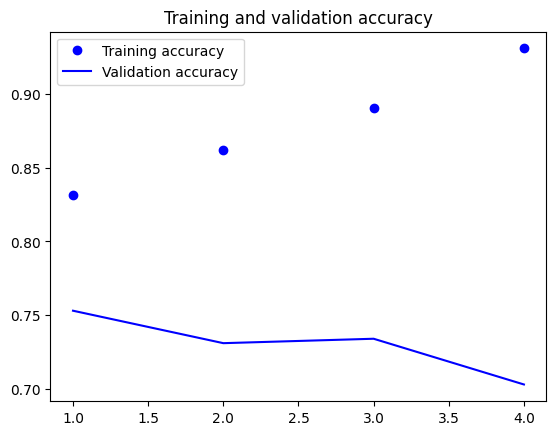

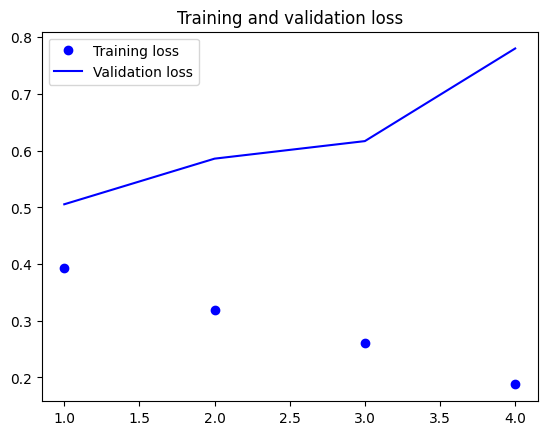

In [33]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [34]:
model.save('convnet_from_scratch.tf')

In [35]:
from keras.saving import load_model

test_model = load_model('convnet_from_scratch.tf')

**Evaluating the model on the test set**

In [36]:
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 26ms/step - loss: 0.5357 - accuracy: 0.7415
Test accuracy: 0.742


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [37]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

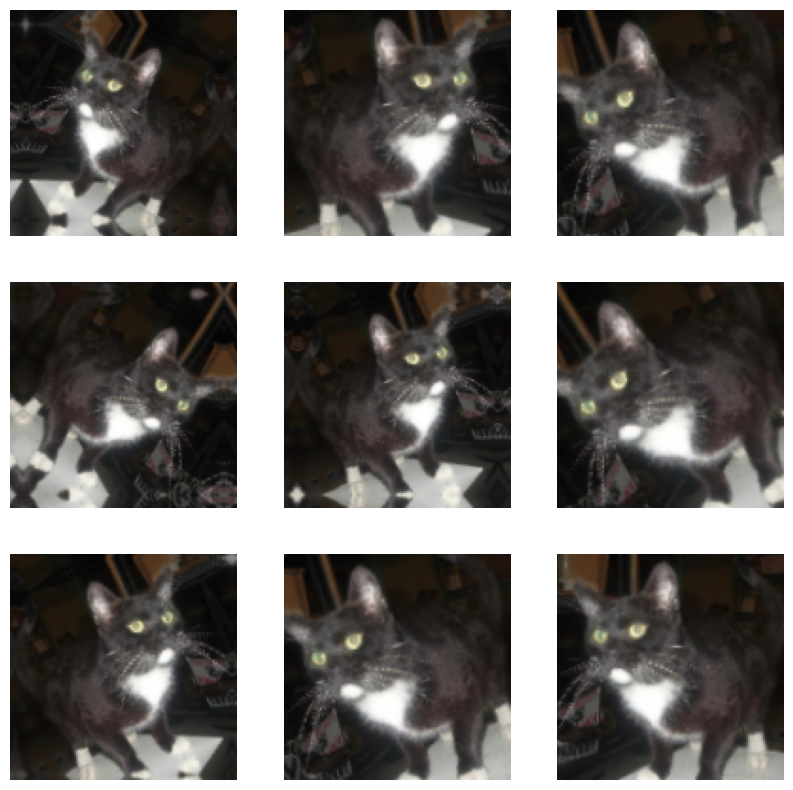

In [38]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [41]:
inputs = keras.Input(shape=(120, 120, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [42]:
cb_check_pointing = keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.tf",   # .keras gives error
        save_best_only=True,
        monitor="val_loss")

callbacks = [cb_check_pointing, cb_early_stop]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
125/125 [==============================] - 10s 58ms/step - loss: 0.7259 - accuracy: 0.5303 - val_loss: 0.6522 - val_accuracy: 0.6700
Epoch 2/100
125/125 [==============================] - 6s 48ms/step - loss: 0.6656 - accuracy: 0.6105 - val_loss: 0.5831 - val_accuracy: 0.6710
Epoch 3/100
125/125 [==============================] - 6s 47ms/step - loss: 0.6247 - accuracy: 0.6578 - val_loss: 0.8005 - val_accuracy: 0.5350
Epoch 4/100
125/125 [==============================] - 6s 48ms/step - loss: 0.6065 - accuracy: 0.6700 - val_loss: 0.5435 - val_accuracy: 0.7160
Epoch 5/100
125/125 [==============================] - 5s 38ms/step - loss: 0.5814 - accuracy: 0.7042 - val_loss: 0.5488 - val_accuracy: 0.6970
Epoch 6/100
125/125 [==============================] - 29s 235ms/step - loss: 0.5849 - accuracy: 0.6905 - val_loss: 0.5187 - val_accuracy: 0.7230
Epoch 7/100
125/125 [==============================] - 6s 49ms/step - loss: 0.5624 - accuracy: 0.7128 - val_loss: 0.5185 - val_accura

**Evaluating the model on the test set**

In [43]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 23ms/step - loss: 0.4395 - accuracy: 0.8055
Test accuracy: 0.805


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [66]:
conv_base = keras.applications.vgg19.VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(120, 120, 3))

In [67]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 120, 120, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 120, 120, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 120, 120, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 60, 60, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 60, 60, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 60, 60, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 30, 30, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [68]:
import numpy as np

def get_features_and_labels(dataset):

    all_features, all_labels = [], []

    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg19.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features,   val_labels   =  get_features_and_labels(validation_dataset)
test_features,  test_labels  =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [69]:
train_features.shape

(4000, 3, 3, 512)

**Defining and training the densely connected classifier**

In [70]:
inputs = keras.Input(shape=(3, 3, 512))

x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

cb_check_pointing = keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.tf",
      save_best_only=True,
      monitor="val_loss")

cb_early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=0)

callback = [cb_early_stop]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
125/125 [==============================] - 1s 5ms/step - loss: 8.9785 - accuracy: 0.9130 - val_loss: 5.8773 - val_accuracy: 0.9430
Epoch 2/20
125/125 [==============================] - 1s 4ms/step - loss: 4.4275 - accuracy: 0.9528 - val_loss: 6.6025 - val_accuracy: 0.9410
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 2.9750 - accuracy: 0.9628 - val_loss: 5.9024 - val_accuracy: 0.9430
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 2.4617 - accuracy: 0.9720 - val_loss: 5.6556 - val_accuracy: 0.9370
Epoch 5/20
125/125 [==============================] - 0s 4ms/step - loss: 1.4314 - accuracy: 0.9765 - val_loss: 5.4533 - val_accuracy: 0.9520
Epoch 6/20
125/125 [==============================] - 1s 4ms/step - loss: 1.4100 - accuracy: 0.9795 - val_loss: 5.7422 - val_accuracy: 0.9470
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 1.3568 - accuracy: 0.9787 - val_loss: 7.6902 - val_accuracy: 0.9240
Epoch 

In [73]:
#loss, acc = model.evaluate(test_dataset)

**Plotting the results**

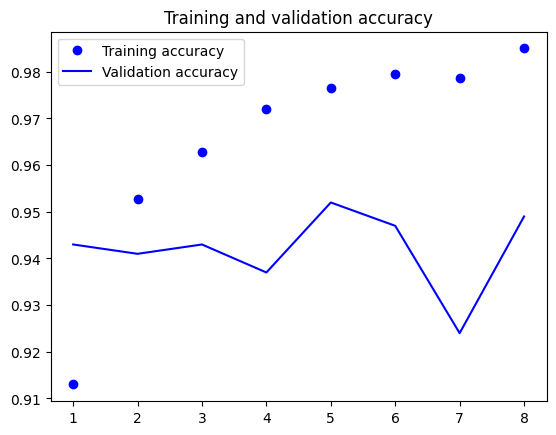

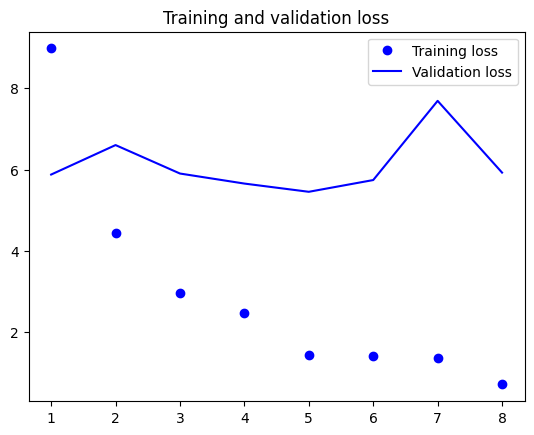

In [71]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [74]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [75]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [76]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [79]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(120, 120, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.tf",
        save_best_only=True,
        monitor="val_loss")
]

callb = [callbacks, cb_early_stop]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callb)

Epoch 1/50
125/125 [==============================] - 11s 83ms/step - loss: 2.2528 - accuracy: 0.9237 - val_loss: 1.7982 - val_accuracy: 0.9450
Epoch 2/50
125/125 [==============================] - 12s 98ms/step - loss: 1.4125 - accuracy: 0.9260 - val_loss: 1.6978 - val_accuracy: 0.9430
Epoch 3/50
125/125 [==============================] - 10s 80ms/step - loss: 0.9899 - accuracy: 0.9265 - val_loss: 0.9764 - val_accuracy: 0.9410
Epoch 4/50
125/125 [==============================] - 10s 81ms/step - loss: 0.7386 - accuracy: 0.9183 - val_loss: 0.5824 - val_accuracy: 0.9400
Epoch 5/50
125/125 [==============================] - 11s 89ms/step - loss: 0.4839 - accuracy: 0.9195 - val_loss: 0.5516 - val_accuracy: 0.9440
Epoch 6/50
125/125 [==============================] - 10s 80ms/step - loss: 0.4244 - accuracy: 0.9342 - val_loss: 0.4466 - val_accuracy: 0.9520
Epoch 7/50
125/125 [==============================] - 8s 60ms/step - loss: 0.4532 - accuracy: 0.9277 - val_loss: 0.4909 - val_accuracy: 

**Evaluating the model on the test set**

In [83]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.tf")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 46ms/step - loss: 0.5841 - accuracy: 0.9435
Test accuracy: 0.943


### Fine-tuning a pretrained model

In [84]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [85]:
for layer in conv_base.layers:
    print(layer)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:  # all layers except last 4 layers
    layer.trainable = False

**Fine-tuning the model**

In [86]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.tf",
        save_best_only=True,
        monitor="val_loss")
]

callb = [callbacks, cb_early_stop]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callb)

Epoch 1/30
125/125 [==============================] - 11s 77ms/step - loss: 0.3322 - accuracy: 0.9438 - val_loss: 0.4335 - val_accuracy: 0.9510
Epoch 2/30
125/125 [==============================] - 10s 78ms/step - loss: 0.2734 - accuracy: 0.9465 - val_loss: 0.4302 - val_accuracy: 0.9530
Epoch 3/30
125/125 [==============================] - 11s 88ms/step - loss: 0.3487 - accuracy: 0.9405 - val_loss: 0.4135 - val_accuracy: 0.9540
Epoch 4/30
125/125 [==============================] - 11s 85ms/step - loss: 0.2975 - accuracy: 0.9465 - val_loss: 0.3969 - val_accuracy: 0.9540
Epoch 5/30
125/125 [==============================] - 10s 80ms/step - loss: 0.2560 - accuracy: 0.9475 - val_loss: 0.3906 - val_accuracy: 0.9550
Epoch 6/30
125/125 [==============================] - 10s 82ms/step - loss: 0.2839 - accuracy: 0.9448 - val_loss: 0.3708 - val_accuracy: 0.9570
Epoch 7/30
125/125 [==============================] - 10s 81ms/step - loss: 0.2319 - accuracy: 0.9477 - val_loss: 0.3616 - val_accuracy:

In [88]:
model = keras.models.load_model("fine_tuning.tf")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 41ms/step - loss: 0.2408 - accuracy: 0.9500
Test accuracy: 0.950


## Summary